## Mounting Google Drive

In [1]:
from google.colab import drive

drive.mount("/content/gdrive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

In [3]:
data = pd.read_excel('gdrive/My Drive/Internships/Internship Studio/Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Dataset Summary

In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Cleaning

In [8]:
data[data['Experience'] < 0]['Experience'].count()

52

In [9]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [10]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

data[data['Experience'] < 0]['Experience'].count()

0

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Number of unique in each column

In [12]:
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             45
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

## Number of people with zero mortgage

In [13]:
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

## Number of people with zero credit card spending per month

In [14]:
data[data['CCAvg'] == 0]['CCAvg'].count()

106

## Value Count of all categorical columns 

---



In [15]:
data.count()

ID                   5000
Age                  5000
Experience           4971
Income               5000
ZIPCode              5000
Family               5000
CCAvg                5000
Education            5000
Mortgage             5000
PersonalLoan         5000
SecuritiesAccount    5000
CDAccount            5000
Online               5000
CreditCard           5000
dtype: int64

## Univariate and Bivariate analysis

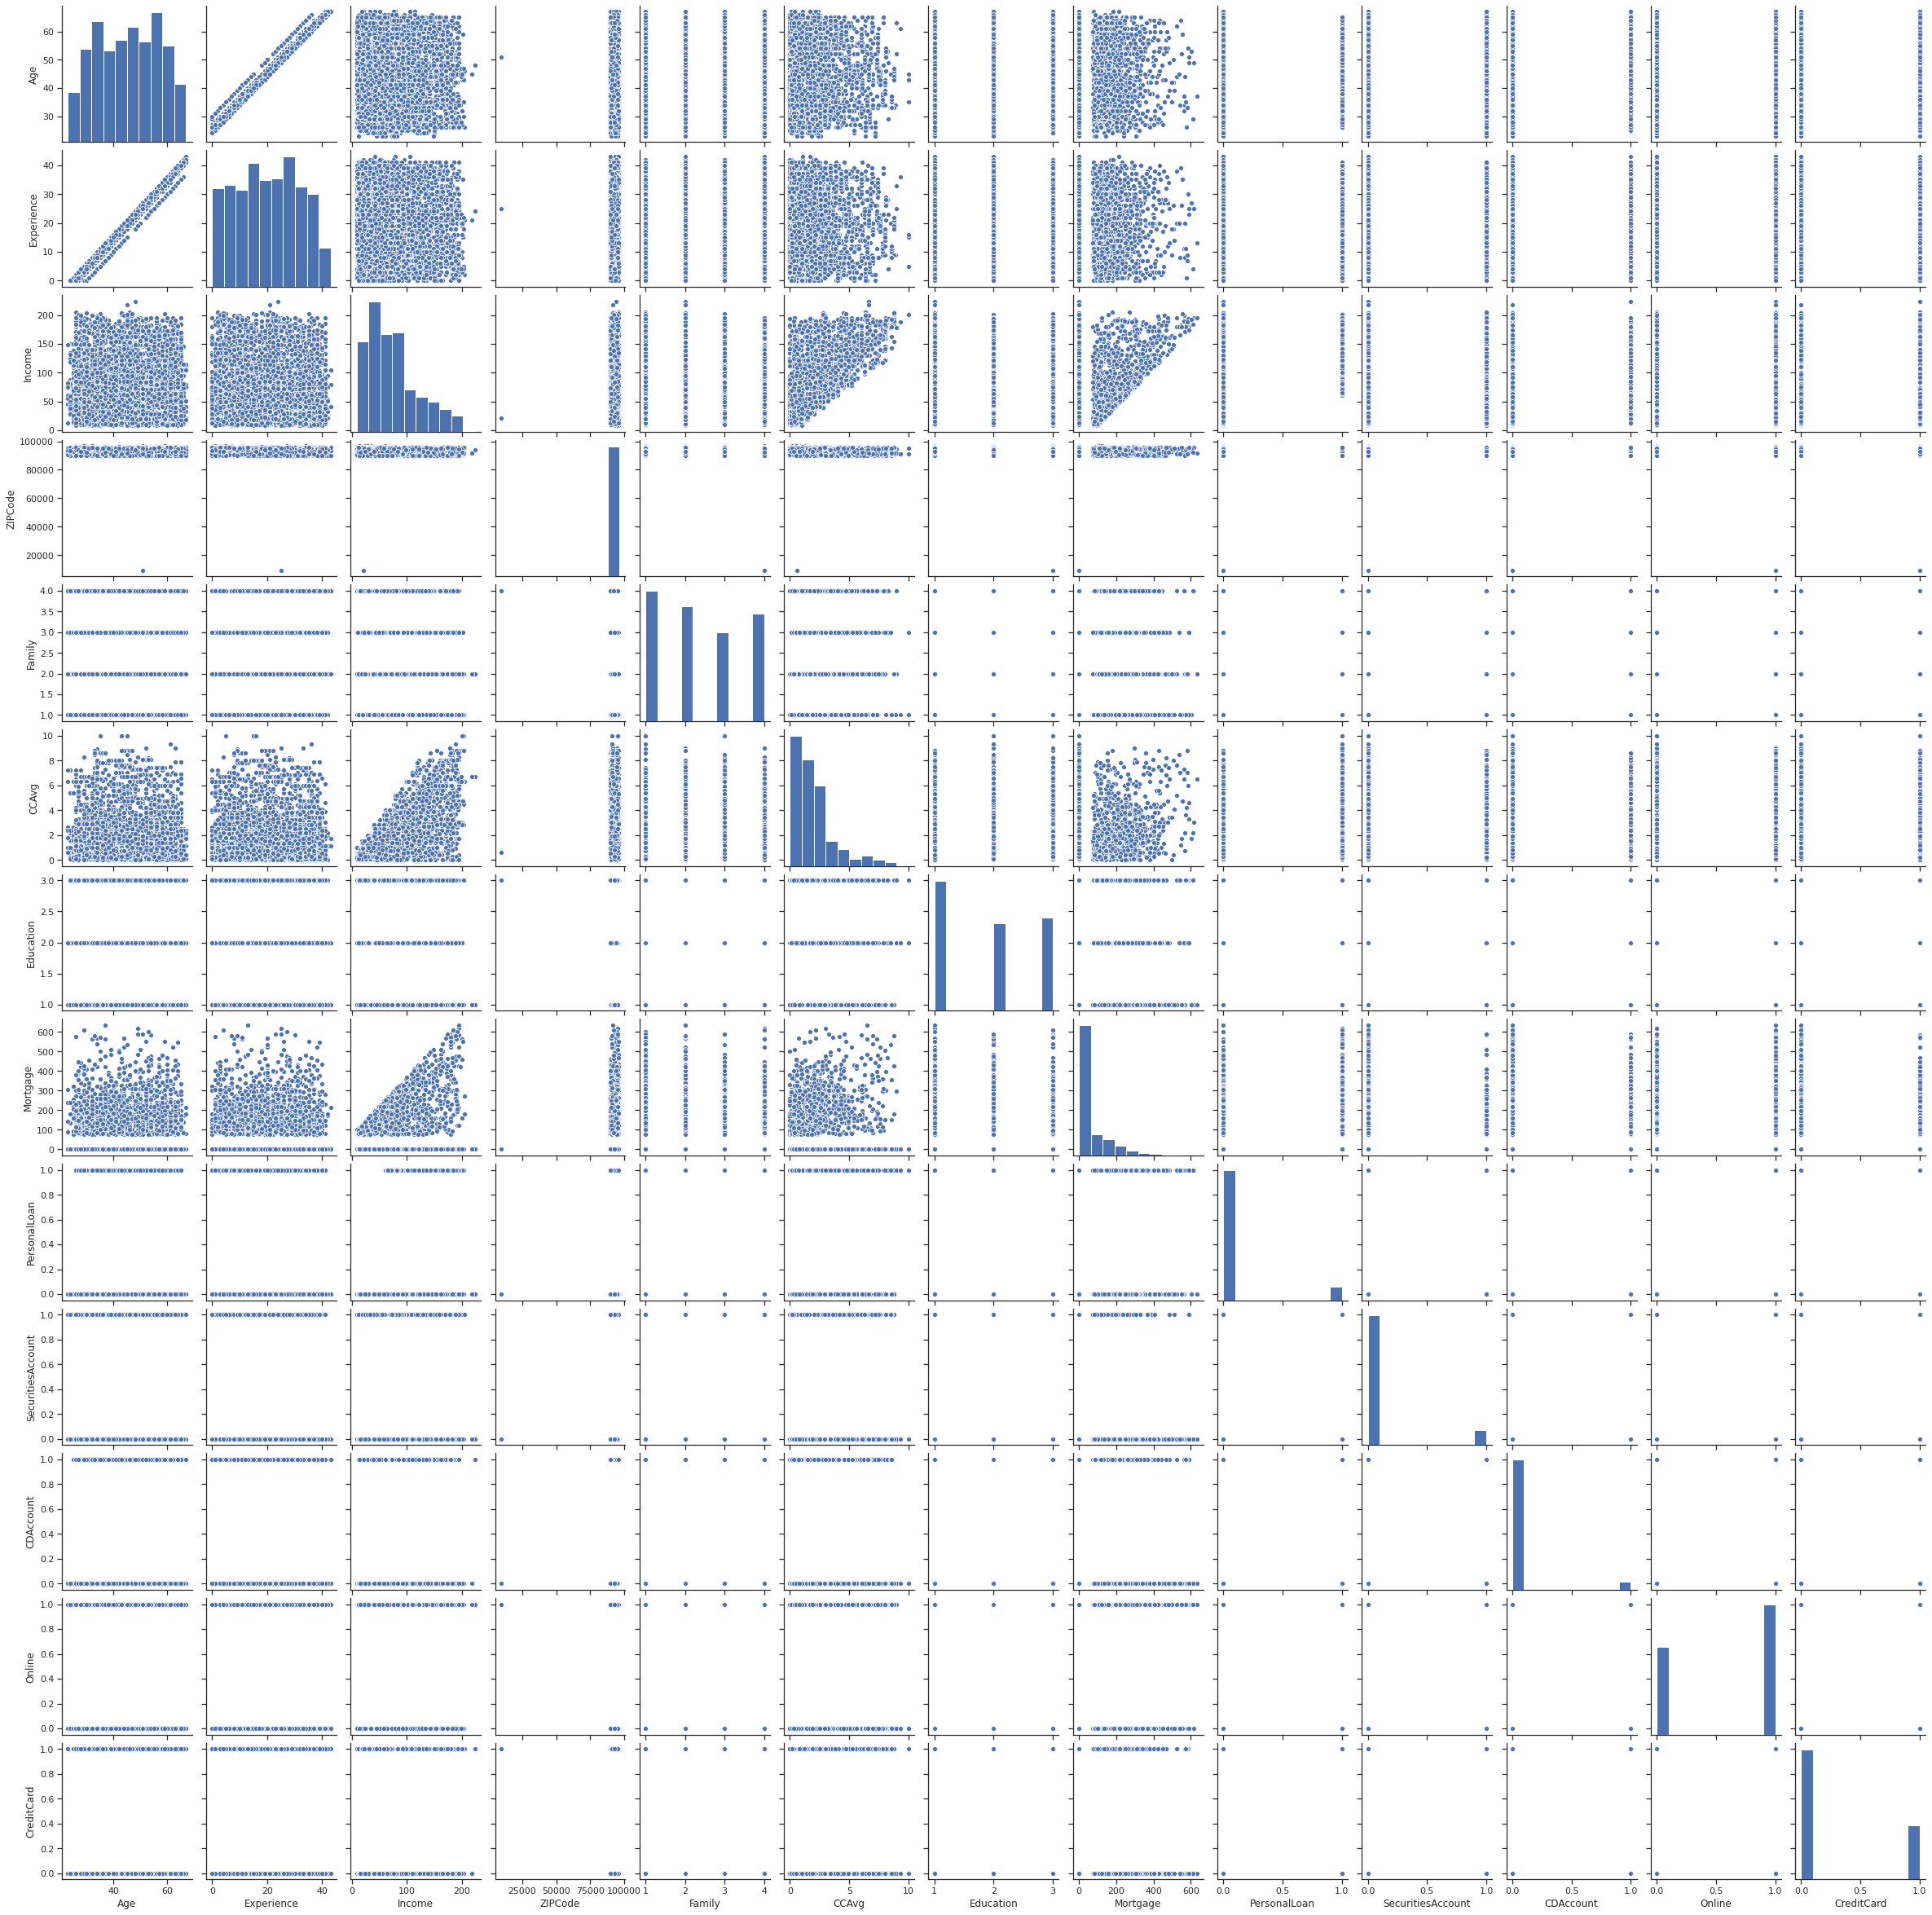

In [16]:
sns.pairplot(data.iloc[:,1:]);

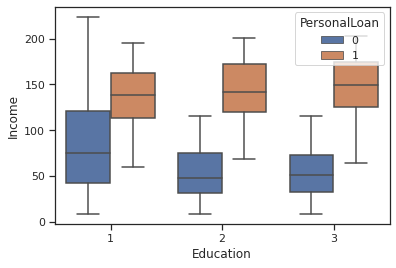

In [17]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data);

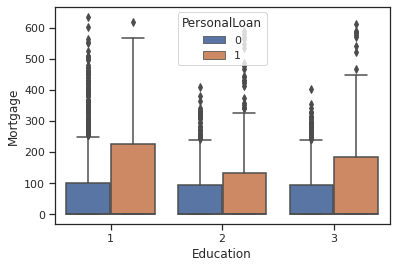

In [18]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data);

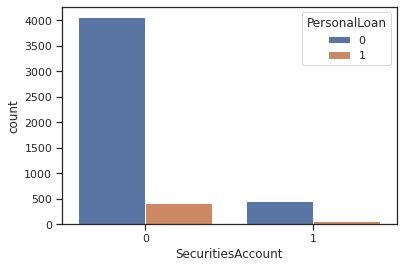

In [19]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan");

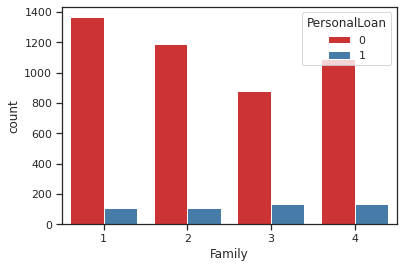

In [20]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1');

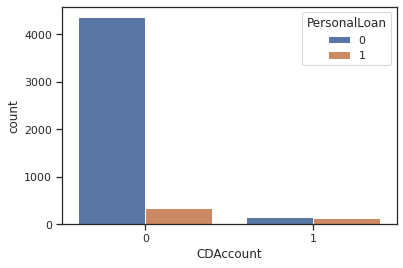

In [21]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan');

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


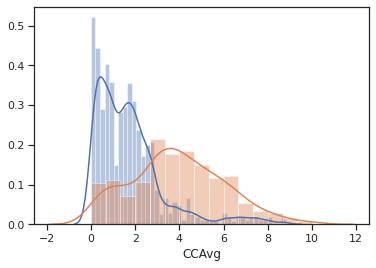

In [22]:
sns.distplot(data[data.PersonalLoan == 0]['CCAvg']);
sns.distplot(data[data.PersonalLoan == 1]['CCAvg']);
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

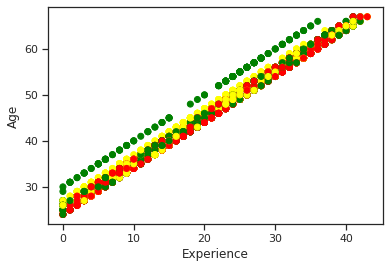

In [23]:
fig, ax = plt.subplots();
colors = {1:'red',2:'yellow',3:'green'};
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]));
plt.xlabel('Experience');
plt.ylabel('Age');

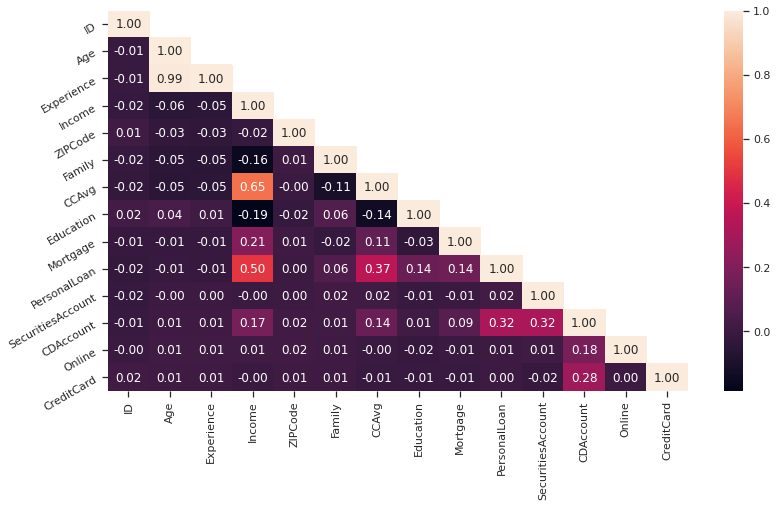

In [24]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f');
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

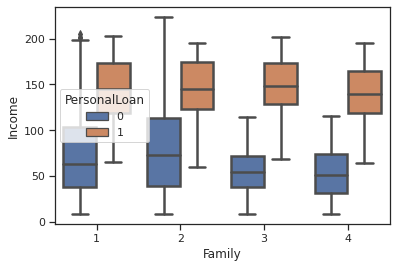

In [25]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

## Split data into train and test data

In [26]:
data = data.drop(['ID','Experience','ZIPCode',], axis=1)
X=data.drop(['PersonalLoan'],axis=1)
y=data['PersonalLoan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

## Logistic Regression

In [27]:
Model1_raw=LogisticRegression(solver='liblinear')
Model1_raw.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
Model1_raw_coef=pd.DataFrame(Model1_raw.coef_)
Model1_raw_coef

,0,1,2,3,4,5,6,7,8,9
0,-0.010613,0.041224,0.408678,0.100677,1.197525,0.000437,-0.915907,3.321583,-0.645462,-0.947622


In [29]:
Model1_raw.score(X_train,y_train)

0.9508571428571428

In [30]:
Model1_raw.score(X_test,y_test)

0.9433333333333334

In [31]:
Model1_raw_prediction=Model1_raw.predict(X_test)

In [32]:
cm_model1=confusion_matrix(y_test,Model1_raw_prediction,labels=[0,1])
print(cm_model1)

[[1326   17]
 [  68   89]]


In [33]:
acc_score_log1=accuracy_score(y_test,Model1_raw_prediction)
f1_score_log1=f1_score(y_test,Model1_raw_prediction)
print("Accuracy Score  for Logistic Regression RAW DATA:{}".format(acc_score_log1*100))
print("F1 Score  for Logistic Regression RAW DATA:{}".format(f1_score_log1*100))

Accuracy Score  for Logistic Regression RAW DATA:94.33333333333334
F1 Score  for Logistic Regression RAW DATA:67.68060836501901


In [34]:
print(classification_report(y_test,Model1_raw_prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.84      0.57      0.68       157

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



## Classification Algortihms

In [35]:
train_set, test_set = train_test_split(data, test_size=0.3 , random_state=100)
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

#### Decision Tree

In [36]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [38]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [39]:
test_set.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
789,29,31,4,0.3,2,0,0,0,1,0
2507,59,60,4,2.1,1,234,0,0,1,1
2376,58,23,3,0.2,1,0,0,0,0,0
1378,54,34,4,0.1,3,0,0,0,1,0
598,56,11,2,0.2,3,90,0,0,0,0


#### Naive Bayes

In [40]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.884

#### Random Forest

In [41]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

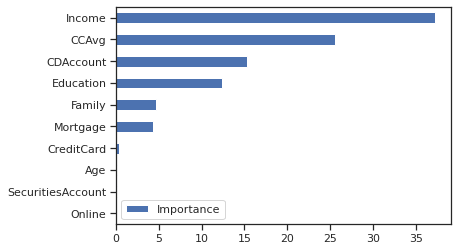

In [42]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns);
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh');

In [43]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.912

#### K-nearest Neighbour

In [44]:
train_set_indep = data.drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [45]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9152768512341561


## Model Comparison

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.914600 (0.011351)
CART: 0.982600 (0.002200)
NB: 0.883000 (0.011567)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.987800 (0.004600)


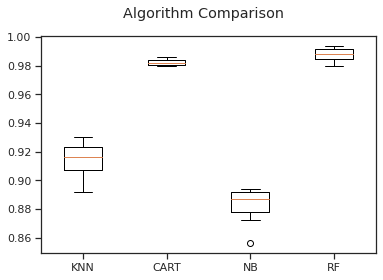

In [46]:
X=data.drop(['PersonalLoan'],axis=1);
y=data.pop('PersonalLoan');

models = [];
models.append(('KNN', KNeighborsClassifier()));
models.append(('CART', DecisionTreeClassifier()));
models.append(('NB', GaussianNB()));
models.append(('RF', RandomForestClassifier()));

results = [];
names = [];
scoring = 'accuracy';
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345);
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring);
	results.append(cv_results);
	names.append(name);
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
	print(msg);

fig = plt.figure();
fig.suptitle('Algorithm Comparison');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);
plt.show();

## Conclusion (Business Understanding)

The aim of the bank is to convert their liability customers into loan customers. For that they need information about the relation between the variables given in the data.

The following are the steps taken for the analysis of data and machine learning modelling:

1.   Mounting the drive for accessing the data.
2.   Importing the libraries used for carrying out various tasks.
3.   Importing the dataset
4.   Analyzing the dataset
     1.   Shape
     2.   Count of Null/Non-null values
     3.   Data types
5.   Cleaning data and analyzing data
     1.   Number of unique columns
     2.   Number of people with zero mortgage
     3.   Number of people with zero credit card spending per month
     4.   Value Count of all categorical columns
     5.   Univariate and bivariate analysis through various graphs
6.   Dropping irrelevant data and splitting into train and test data
7.   Applying logistic regression classification and examining its performance through various methods
8.   Applying other classification algorithms and comparing their performances
     1.   Decision Tree
     2.   Naïve Bayes
     3.   Random Forest
     4.   K-nearest Neighbors

Inferences:

*   The dataset is imbalanced.
*   Income has the most effect on the probability of people taking loans.
*   Age has the least effect on the probability of people taking loans.
*   Based on the accuracy score of each of the 5 classification models, Random Forest seems to perform the best.


